# Reproduce CheXNet: Explore Predictions

## Import other modules and pandas

In [80]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import visualize_prediction as V

import pandas as pd

#suppress pytorch warnings about source code changes
import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Settings for review
We can examine individual results in more detail, seeing probabilities of disease for test images. 

We get you started with a small number of the images from the large NIH dataset. 

To explore the full dataset, [download images from NIH (large, ~40gb compressed)](https://nihcc.app.box.com/v/ChestXray-NIHCC), extract all tar.gz files to a single folder, place that path  below and set STARTER_IMAGES=False

In [81]:
#STARTER_IMAGES=True
#PATH_TO_IMAGES = "starter_images/"

IMAGE_DF_FULL = pd.read_csv('../MMMTL_Data_Slicing/CheXNet/cxr-8-data/subset_analysis_data.csv')
IMAGE_DF = IMAGE_DF_FULL.filter(['Image Index'])

PATH_TO_IMAGES = "/lfs/1/jdunnmon/data/nih/images/images"

PATH_TO_LABELS = 'nih_labels.csv'
LABEL_DF = pd.read_csv(PATH_TO_LABELS)

DF_FULL = pd.merge(left=LABEL_DF,right=IMAGE_DF_FULL, how="inner",on="Image Index")

Load pretrained model (part of cloned repo; should not need to change path unless you want to point to one you retrained)

In [82]:
PATH_TO_MODEL = "pretrained/checkpoint"

Pick the finding you want to see positive examples of:

LABEL can be set to any of:
- Atelectasis
- Cardiomegaly
- Consolidation
- Edema
- Effusion
- Emphysema
- Fibrosis
- Hernia
- Infiltration
- Mass
- Nodule
- Pleural_Thickening
- Pneumonia
- Pneumothorax


In [83]:
LABEL="Pneumothorax"

It's more interesting when initially exploring to see cases positive for pathology of interest:

In [84]:
POSITIVE_FINDINGS_ONLY=True

In [85]:
IMAGE_DF_FULL.head(4)

,Image Index,pred,drain,pigtail,subcut
0,00000071_001.png,0.064088,0,0,0
1,00000211_019.png,0.135613,1,0,0
2,00000211_023.png,0.012777,0,0,0
3,00000285_005.png,0.003009,0,0,0


## Load data

This loads up dataloader and model (note: only test images not used for model training are loaded).

In [86]:
dataloader,model= V.load_data(PATH_TO_IMAGES,LABEL,PATH_TO_MODEL,POSITIVE_FINDINGS_ONLY,IMAGE_DF)
print("Cases for review:")
print(len(dataloader))

Cases for review:
1088


## Examine individual cases

To explore, run code below to see a random case positive for your selected finding, a heatmap indicating the most influential regions of the image, and the model's estimated probabilities for findings. For many diagnoses, you can see that the model uses features outside the expected region to calibrate its predictions -- [you can read my discussion about this here](https://medium.com/@jrzech/what-are-radiological-deep-learning-models-actually-learning-f97a546c5b98).

Please note that:
1) the NIH dataset was noisily labeled by automatically extracting labels from text reports written by radiologists, as described in paper [here](https://arxiv.org/pdf/1705.02315.pdf) and analyzed [here](https://lukeoakdenrayner.wordpress.com/2017/12/18/the-chestxray14-dataset-problems/), so we should not be surprised to see inaccuracies in the provided ground truth labels 
2) high AUCs can be achieved even if many positive cases are assigned absolutely low probabilities of disease, as AUC depends on the relative ranking of probabilities between cases. 

You can run the below cell repeatedly to see different examples:

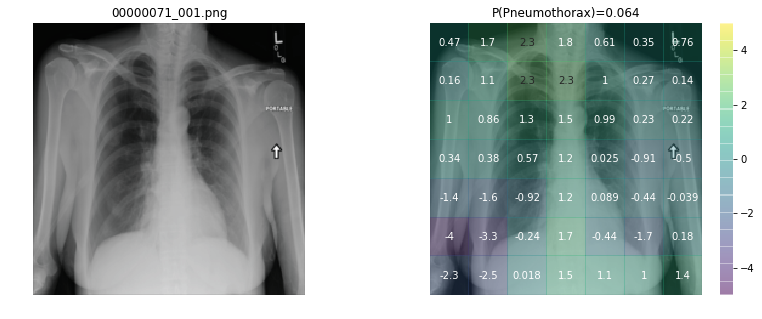

In [11]:
preds=V.show_next(dataloader,model, LABEL)

In [12]:
DF_PRINT = DF_FULL.filter(['Image Index','Pneumothorax','drain','pigtail','subcut','fold','pred'])
DF_PRINT[DF_PRINT['Image Index'] ==preds[1]]

,Image Index,Pneumothorax,drain,pigtail,subcut,fold,pred
0,00000071_001.png,1.0,0,0,0,test,0.064088


In [13]:
preds[0]

,Predicted Probability,Ground Truth
Finding,,
Infiltration,0.107,False
Pneumothorax,0.064,True
Nodule,0.056,False
Mass,0.047,False
Atelectasis,0.040,False
Emphysema,0.031,False
Effusion,0.021,False
Fibrosis,0.017,False
Pleural_Thickening,0.012,False


## Exploring Predictions

In [40]:
from eval_model import make_pred_multilabel
dataloader,model= V.load_data(PATH_TO_IMAGES,LABEL,PATH_TO_MODEL,False,None)
model.cuda()
preds, aucs, labels = make_pred_multilabel(dataloader, model, PATH_TO_IMAGES, loader=True, save=False)

Evaluated 0 of 22433 Examples...
Evaluated 1600 of 22433 Examples...
Evaluated 3200 of 22433 Examples...
Evaluated 4800 of 22433 Examples...
Evaluated 6400 of 22433 Examples...
Evaluated 8000 of 22433 Examples...
Evaluated 9600 of 22433 Examples...
Evaluated 11200 of 22433 Examples...
Evaluated 12800 of 22433 Examples...
Evaluated 14400 of 22433 Examples...
Evaluated 16000 of 22433 Examples...
Evaluated 17600 of 22433 Examples...
Evaluated 19200 of 22433 Examples...
Evaluated 20800 of 22433 Examples...
Evaluated 22400 of 22433 Examples...
Over dataset size, ignoring...
22433
Over dataset size, ignoring...
22434
Over dataset size, ignoring...
22435
Over dataset size, ignoring...
22436
Over dataset size, ignoring...
22437
Over dataset size, ignoring...
22438
Over dataset size, ignoring...
22439
Over dataset size, ignoring...
22440
Over dataset size, ignoring...
22441
Over dataset size, ignoring...
22442
Over dataset size, ignoring...
22443
Over dataset size, ignoring...
22444
Over datase

In [44]:
preds.head()

,Image Index,prob_Atelectasis,prob_Cardiomegaly,prob_Consolidation,prob_Edema,prob_Effusion,prob_Emphysema,prob_Fibrosis,prob_Hernia,prob_Infiltration,prob_Mass,prob_Nodule,prob_Pleural_Thickening,prob_Pneumonia,prob_Pneumothorax
0,00000010_000.png,0.037808,0.068051,0.005170,0.000444,0.013289,0.021431,0.100713,0.010700,0.132402,0.004173,0.026534,0.024778,0.004577,0.042585
1,00000054_001.png,0.482061,0.001373,0.017773,0.007678,0.038918,0.008552,0.001335,0.001159,0.194110,0.004546,0.005599,0.002019,0.006350,0.005857
2,00000071_002.png,0.007817,0.000410,0.012528,0.001027,0.013440,0.030960,0.129627,0.002142,0.100178,0.012135,0.036426,0.079202,0.004722,0.035687
3,00000071_003.png,0.003722,0.000167,0.007032,0.000656,0.002600,0.004958,0.026335,0.000394,0.124913,0.005335,0.016879,0.022240,0.003697,0.008940
4,00000071_004.png,0.006519,0.000616,0.018882,0.000889,0.017549,0.054319,0.161955,0.002765,0.103472,0.025665,0.069990,0.104147,0.006950,0.021629


In [43]:
labels.head()

,Image Index,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000010_000.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,00000054_001.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00000071_002.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,00000071_003.png,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,00000071_004.png,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [340]:
sklm.roc_auc_score(labels['Pneumothorax'], preds['prob_Pneumothorax'])

0.87385195329824117

In [225]:
import numpy as np
#IMAGE_DF_FULL.set_index('Image Index', inplace=True)
#labels.set_index('Image Index', inplace=True)
#preds.set_index('Image Index', inplace=True)
inds['pneumo_drain'] = list(IMAGE_DF_FULL[IMAGE_DF_FULL['drain']==1].index)
inds['pneumo_no_drain'] = list(IMAGE_DF_FULL[IMAGE_DF_FULL['drain']==0].index)
inds['negs'] = list(labels[labels['Pneumothorax']==0].index)
inds['pneumo'] = list(labels[labels['Pneumothorax']==1].index)

In [226]:
sum(preds['prob_Pneumothorax'][auc_inds].isnull())

0

0.906168950854
0.911253031134


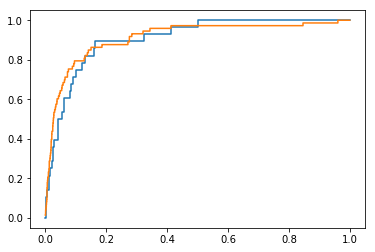

In [214]:
import matplotlib.pyplot as plt
auc_inds_dict = {}
for tp in ['pneumo_no_drain','pneumo_drain']:
    auc_inds = inds[tp]+inds['negs']
    auc_inds_dict[tp] = auc_inds
    lab = labels['Pneumothorax'][auc_inds]
    pred = preds['prob_Pneumothorax'][auc_inds]
    print(sklm.roc_auc_score(lab, pred))
    roc_pneumo = sklm.roc_curve(lab, pred)

    plt.plot(roc_pneumo[0],roc_pneumo[1])

In [277]:
len([a for a in labels.index if a in IMAGE_DF['Image Index']])

0

In [278]:
[a for a in labels.index][0]

'00000010_000.png'

In [247]:
labels['Pneumothorax'][inds['pneumo_no_drain'][0]]

KeyError: '00000071_001.png'

In [161]:
tp = 'pneumo_no_drain'
cr = sklm.classification_report(labels['Pneumothorax'][auc_inds_dict[tp]],  preds['prob_Pneumothorax'][auc_inds_dict[tp]]>0.1)
print(cr)

             precision    recall  f1-score   support

        0.0       1.00      0.92      0.96     21707
        1.0       0.01      0.83      0.02        23

avg / total       1.00      0.92      0.96     21730



In [47]:
len(IMAGE_DF_ALL)

1087

In [108]:

sklm.roc_auc_score(labels['Pneumothorax'], preds['prob_Pneumothorax'])

0.87385195329824117

In [15]:
IMAGE_DF_ALL = pd.merge(left=preds,right=DF_PRINT, how="inner",on="Image Index")
NIH_DF_ALL = pd.merge(left=preds, right=LABEL_DF, how="inner", on="Image Index")

In [16]:
IMAGE_DF_ALL.filter(['Image Index','Pneumothorax','prob_Pneumothorax','drain','pigtail','subcut','fold','pred'])

,Image Index,Pneumothorax,prob_Pneumothorax,drain,pigtail,subcut,fold,pred
0,00000211_019.png,1.0,0.008431,1,0,0,test,0.135613
1,00000211_023.png,1.0,0.000348,0,0,0,test,0.012777
2,00000285_005.png,1.0,0.003241,0,0,0,test,0.003009
3,00000285_006.png,1.0,0.001005,0,0,0,test,0.001984
4,00000285_007.png,1.0,0.002279,0,0,0,test,0.000454
5,00000372_002.png,1.0,0.006160,1,0,0,test,0.164058
6,00000372_003.png,1.0,0.000814,1,0,0,test,0.523885
7,00000372_004.png,1.0,0.003333,0,0,0,test,0.291824
8,00000404_002.png,1.0,0.291824,0,0,0,test,0.350120
9,00000493_000.png,1.0,0.307960,0,0,0,test,0.004935


In [17]:
import sklearn.metrics as sklm
# Threshold
thresh = 0.5


# Getting classification report for only pneumo images labeled by LOR
pred = IMAGE_DF_ALL['prob_Pneumothorax'] > thresh
actual = IMAGE_DF_ALL['Pneumothorax'] 
print(sklm.classification_report(actual.as_matrix().astype(int), pred.as_matrix().astype(int)))

print('\n ######################################################\n')
# Getting classification report for all pneumo images
pred = NIH_DF_ALL['prob_Pneumothorax'] > thresh
actual = NIH_DF_ALL['Pneumothorax'] 
print(sklm.classification_report(actual.as_matrix().astype(int), pred.as_matrix().astype(int)))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       1.00      0.03      0.06      1087

avg / total       1.00      0.03      0.06      1087


 ######################################################

             precision    recall  f1-score   support

          0       0.95      0.98      0.97     21315
          1       0.08      0.03      0.04      1088

avg / total       0.91      0.94      0.92     22403



In [34]:
roc_pneumo = sklm.roc_curve(NIH_DF_ALL['Pneumothorax'],  NIH_DF_ALL['prob_Pneumothorax'])
auc_pneumo = sklm.roc_auc_score(NIH_DF_ALL['Pneumothorax'],  NIH_DF_ALL['prob_Pneumothorax'])

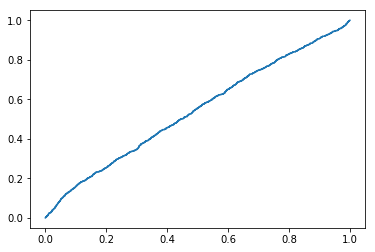

In [33]:
import matplotlib.pyplot as plt
plt.plot(roc_pneumo[0],roc_pneumo[1])

In [20]:
NIH_DF_ALL[NIH_DF_ALL['Image Index']=='00000071_001.png']

,Image Index,prob_Atelectasis,prob_Cardiomegaly,prob_Consolidation,prob_Edema,prob_Effusion,prob_Emphysema,prob_Fibrosis,prob_Hernia,prob_Infiltration,...,Mass,Nodule,Atelectasis,Pneumothorax,Pleural_Thickening,Pneumonia,Fibrosis,Edema,Consolidation,fold


(array([ 906.,   60.,   36.,   26.,   20.,   11.,   14.,    6.,    4.,    4.]),
 array([  1.01410296e-05,   9.16993156e-02,   1.83388490e-01,
          2.75077665e-01,   3.66766839e-01,   4.58456014e-01,
          5.50145188e-01,   6.41834363e-01,   7.33523537e-01,
          8.25212712e-01,   9.16901886e-01]),
 <a list of 10 Patch objects>)

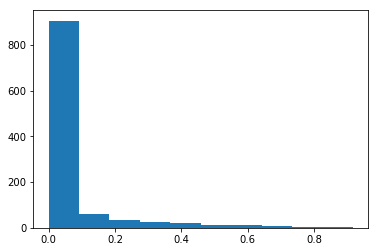

In [21]:
import matplotlib.pyplot as plt
plt.hist(IMAGE_DF_ALL['prob_Pneumothorax'])

(array([ 416.,  174.,   92.,   86.,   92.,   86.,   67.,   42.,   20.,   12.]),
 array([  3.55455937e-04,   9.62433222e-02,   1.92131188e-01,
          2.88019055e-01,   3.83906921e-01,   4.79794787e-01,
          5.75682653e-01,   6.71570520e-01,   7.67458386e-01,
          8.63346252e-01,   9.59234118e-01]),
 <a list of 10 Patch objects>)

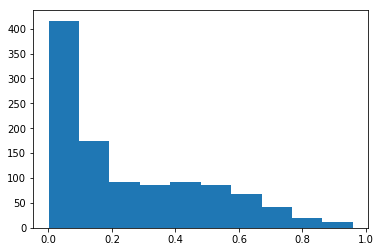

In [22]:
plt.hist(IMAGE_DF_ALL['pred'])

In [18]:
aucs

,label,auc
0,Atelectasis,0.815980
1,Cardiomegaly,0.910392
2,Consolidation,0.801230
3,Edema,0.897837
4,Effusion,0.883760
5,Emphysema,0.922682
6,Fibrosis,0.829160
7,Hernia,0.900940
8,Infiltration,0.707937
9,Mass,0.830666


In [20]:
# Looking at size of prediction
preds_for_pn = IMAGE_DF_ALL.filter(['Image Index','Pneumothorax','prob_Pneumothorax','drain','pigtail','subcut','fold','pred'])

In [49]:
import copy
def evaluate_preds_by_subset(df, bool_cols, pred_col):
    dfc = copy.deepcopy(df)
    dfc['bool'] = dfc[bool_cols].sum(axis=1).astype(bool)
    pos_score = dfc[dfc['bool']==1][pred_col].mean()
    neg_score = dfc[dfc['bool']==0][pred_col].mean() 
    return pos_score, neg_score
    

In [56]:
evaluate_preds_by_subset(preds_for_pn,['drain'],'pred')

(0.3405544409604521, 0.10823714450479527)

In [55]:
0.0735/0.05

1.4699999999999998

## PULLING OUT FEATURES

In [15]:
from eval_model import make_pred_multilabel
dataloader,model= V.load_data(PATH_TO_IMAGES,"any",PATH_TO_MODEL,False,None)

In [16]:
Ωdataloader.batch_sampler.batch_size = 16

In [17]:
import torch
import torch.nn.functional as F
from torch.autograd import Variable
results_dict = {}
model.cuda()
model.eval()
for ii, batch in enumerate(dataloader):
   # print(ii)
    if ii % 100 == 0:
        print(f"{ii/len(dataloader)*100} Percent Complete...")
    X,y,uid = batch
    features = model.features(Variable(X, volatile=True).cuda())
    out = F.relu(features, inplace=True)
    out = F.adaptive_avg_pool2d(out, (1, 1)).view(features.size(0), -1)
    for jj, u in enumerate(uid):
        results_dict[u] = out[jj]
    del X, y, uid

0.0 Percent Complete...
7.127583749109053 Percent Complete...
14.255167498218105 Percent Complete...
21.382751247327157 Percent Complete...
28.51033499643621 Percent Complete...
35.637918745545264 Percent Complete...
42.765502494654314 Percent Complete...
49.89308624376336 Percent Complete...
57.02066999287242 Percent Complete...
64.14825374198146 Percent Complete...
71.27583749109053 Percent Complete...
78.40342124019958 Percent Complete...
85.53100498930863 Percent Complete...
92.65858873841768 Percent Complete...
99.78617248752673 Percent Complete...


In [32]:
for ky in results_dict.keys():
    results_dict[ky] = results_dict[ky].cpu().data.numpy()

In [35]:
import pickle
with open('test_set_features.pkl','wb') as fl:
    pickle.dump(results_dict,fl)

## SANDBOX

In [8]:
import pickle
import sklearn.metrics as sklm

#preds_dict = {
#    'preds':preds,
#    'aucs': aucs,
#    'labels':labels
#}

#with open('preds_dict.pkl','wb') as fl:
#    pickle.dump(preds_dict,fl)

In [9]:
# Loading data for subset analysis
import pandas as pd
with open('preds_dict.pkl','rb') as fl:
    preds_dict_tmp = pickle.load(fl)
    preds = preds_dict_tmp['preds']
    labels = preds_dict_tmp['labels']
    aucs = preds_dict_tmp['aucs'] 
        
subset_df = pd.read_csv('../MMMTL_Data_Slicing/CheXNet/cxr-8-data/subset_analysis_data.csv')
label_df = pd.read_csv('nih_labels.csv')

labels.set_index('Image Index', inplace=True)
preds.set_index('Image Index', inplace=True)
subset_df.set_index('Image Index', inplace=True)
label_df.set_index('Image Index', inplace=True)

# Only run once
#test_labels = label_df[label_df['fold']=='test']

In [10]:
# Test if computed and recorded AUCs from reproduce-chexnet are the same
# If this completes, we know the predictions and labels are correctly generated and loaded
for _, rw in aucs.iterrows():
    ky = rw[0]
    val = rw[1]
    auc = sklm.roc_auc_score(labels[ky],preds[f'prob_{ky}'])
    assert(auc == val)

In [12]:
inds= {}
#inds['pneumo_drain'] = list(subset_df[(subset_df['drain']==1) | (subset_df['subcut']==1)].index)
#inds['pneumo_no_drain'] = list(subset_df[(subset_df['drain']==0) & (subset_df['subcut']==0)].index)
inds['pneumo_drain'] = list(subset_df[(subset_df['drain']==1)].index)
inds['pneumo_no_drain'] = list(subset_df[(subset_df['drain']==0)].index)
inds['negs'] = list(test_labels[test_labels['Pneumothorax']==0].index)
inds['pneumo'] = list(test_labels[test_labels['Pneumothorax']==1].index)
for k,v in inds.items():
    print(f'Length of {k} subset: {len(v)}')
len(set.intersection(set(inds['pneumo_no_drain']), set(labels['Pneumothorax'].index)))

Length of pneumo_drain subset: 672
Length of pneumo_no_drain subset: 416
Length of negs subset: 21344
Length of pneumo subset: 1089


416

In [35]:
inds_auc = inds['pneumo_drain'] + inds['negs']
thresh = 0.5
cr = sklm.roc_auc_score(labels['Pneumothorax'].loc[inds_auc], preds['prob_Pneumothorax'].loc[inds_auc])

AUC: 0.9403859035883843
Sensitivity: 0.27529761904761907
Specificity: 0.990301724137931


In [34]:
sklm.recall_score?

Signature:
sklm.recall_score(
    y_true,
    y_pred,
    labels=None,
    pos_label=1,
    average='binary',
    sample_weight=None,
)
Docstring:
Compute the recall

The recall is the ratio ``tp / (tp + fn)`` where ``tp`` is the number of
true positives and ``fn`` the number of false negatives. The recall is
intuitively the ability of the classifier to find all the positive samples.

The best value is 1 and the worst value is 0.

Read more in the :ref:`User Guide <precision_recall_f_measure_metrics>`.

Parameters
----------
y_true : 1d array-like, or label indicator array / sparse matrix
    Ground truth (correct) target values.

y_pred : 1d array-like, or label indicator array / sparse matrix
    Estimated targets as returned by a classifier.

labels : list, optional
    The set of labels to include when ``average != 'binary'``, and their
    order if ``average is None``. Labels present in the data can be
    excluded, for example to calculate a multiclass average ignoring a
    majo

In [67]:
auc_inds_dict = {}
roc_pneumo = {}
auc_pneumo = {}
thresh = 0.04
for tp in ['pneumo_no_drain','pneumo_drain','pneumo']:
    auc_inds = inds[tp]+inds['negs']
    auc_inds_dict[tp] = auc_inds
    lab = labels['Pneumothorax'][auc_inds]
    pred = preds['prob_Pneumothorax'][auc_inds]
    auc_pneumo[tp] = sklm.roc_auc_score(lab, pred)
    roc_pneumo[tp] = sklm.roc_curve(lab, pred)
    
    spec0p5_ind = np.argmin(np.abs((1-roc_pneumo[tp][0])-0.5))
    thresh = roc_pneumo[tp][2][spec0p5_ind]

    print(f'{tp} AUC: {auc_pneumo[tp]}')
    sens = sklm.recall_score(lab, pred>thresh)
    spec = sklm.recall_score(lab, pred>thresh, pos_label=0)
    
    print(f'{tp} Sensitivity: {sens}')
    print(f'{tp} Specificity: {spec}')
    print('')
    
    #plt.plot(roc_pneumo[0],roc_pneumo[1])

pneumo_no_drain AUC: 0.766348158552935
pneumo_no_drain Sensitivity: 0.8509615384615384
pneumo_no_drain Specificity: 0.49990629685157423

pneumo_drain AUC: 0.9403859035883843
pneumo_drain Sensitivity: 0.9940476190476191
pneumo_drain Specificity: 0.4892241379310345

pneumo AUC: 0.8739462913171514
pneumo Sensitivity: 0.9393939393939394
pneumo Specificity: 0.49990629685157423



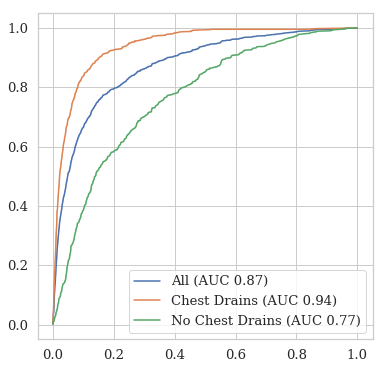

In [69]:
import seaborn as sns
sns.set(font_scale=1.2) 
sns.set_style("whitegrid")
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})


import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(6,6))
handles = {
    'pneumo_no_drain': 'No Chest Drains',
    'pneumo_drain': 'Chest Drains',
    'pneumo': 'All',
}
palette = sns.xkcd_palette
for tp in ['pneumo','pneumo_drain','pneumo_no_drain']:
    sns.lineplot(roc_pneumo[tp][0], roc_pneumo[tp][1],label=f'{handles[tp]} (AUC {np.round(auc_pneumo[tp],2)})', palette=palette)

save_res = False
if save_res:
    plt.savefig('subset_analysis/Pneumo-ROC.eps',format='eps')
    plt.savefig('subset_analysis/Pneumo-ROC.png',format='png')
plt.show()

In [71]:
# MURA PLOTTING
import pandas as pd
df_mura = pd.read_csv('subset_analysis/mura_test_export.csv', index_col=0)
roc_mura = {}
auc_mura = {}
preds_mura = {}
labs_mura = {}

for tp in ['overall', 'fracture', 'hardware', 'joint_dz']:
    if tp == 'overall':
        df_temp = df_mura
    else:
        df_temp = df_mura[df_mura['label'].isin([tp,'normal'])]
    preds_mura[tp] = df_temp['preds2']
    labs_mura[tp] = df_temp['label_y']
    roc_mura[tp] = sklm.roc_curve(df_temp['label_y'],df_temp['preds2'])
    auc_mura[tp] = sklm.roc_auc_score(df_temp['label_y'],df_temp['preds2'])
    
    spec0p5_ind = np.argmin(np.abs((1-roc_mura[tp][0])-0.5))
    thresh = roc_mura[tp][2][spec0p5_ind]

    print(f'{tp} AUC: {auc_mura[tp]}')
    sens = sklm.recall_score(labs_mura[tp], preds_mura[tp]>thresh)
    spec = sklm.recall_score(labs_mura[tp], preds_mura[tp]>thresh, pos_label=0)
    
    print(f'{tp} Sensitivity: {sens}')
    print(f'{tp} Specificity: {spec}')
    print('')

overall AUC: 0.9097316704459562
overall Sensitivity: 0.9305555555555556
overall Specificity: 0.5

fracture AUC: 0.8603434816549571
fracture Sensitivity: 0.8934426229508197
fracture Specificity: 0.4857142857142857

hardware AUC: 0.9846469622331692
hardware Sensitivity: 0.996551724137931
hardware Specificity: 0.4523809523809524

joint_dz AUC: 0.7561172161172162
joint_dz Sensitivity: 0.8
joint_dz Specificity: 0.5



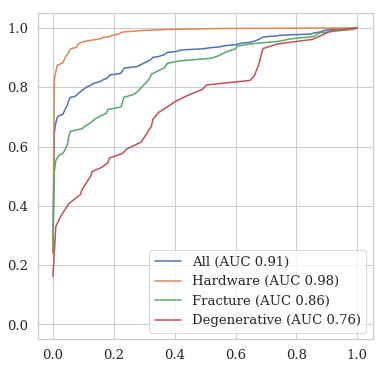

In [184]:
import seaborn as sns
sns.set(font_scale=1.2) 
sns.set_style("whitegrid")
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})


import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(6,6))
handles = {
    'overall': 'All',
    'fracture': 'Fracture',
    'hardware': 'Hardware',
    'joint_dz': 'Degenerative'
}
palette = sns.xkcd_palette
for tp in ['overall','hardware','fracture','joint_dz']:
    sns.lineplot(roc_mura[tp][0], roc_mura[tp][1],
                 label=f'{handles[tp]} (AUC {np.round(auc_mura[tp],2)})', 
                 palette=palette,
                 ci=None)

plt.ylim([-0.05, 1.05])
plt.xlim([-0.05, 1.05])
save_res = True
if save_res:
    plt.savefig('subset_analysis/MURA-ROC.eps',format='eps')
    plt.savefig('subset_analysis/MURA-ROC.png',format='png')

In [ ]:
# Setting up conversion from numpy to R
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()

# Getting R packages
from rpy2.robjects.packages import importr
proc = importr('pROC')

# Computing P-values
def delong_p(scores_1, scores_2, labels_1, labels_2=None):
    if labels_2 is None:
        labels_2 = labels_1
    # uses two-sided delong test
    roc1 = proc.roc(labels_1, scores_1)
    roc2 = proc.roc(labels_2, scores_2)
    test = proc.roc_test(roc1,roc2,method='delong')
    test_dict = dict(zip(test.names, list(test)))
    auc1, auc2 = [float(a) for a in test_dict['estimate']]
    p = [float(a) for a in (test_dict['p.value'])][0]
    return p, auc1, auc2



In [186]:
import pickle
with open(f"subset_analysis/predictions.pkl",'rb') as fl:
    preds_dict = pickle.load(fl)
    
prediction_df = pd.DataFrame(preds_dict)

In [188]:
import sys
sys.path.append('../pytorch-classification/')
from analysis.analysis_utils import get_coarse_accuracies
coarse_results = get_coarse_accuracies(prediction_df)

ModuleNotFoundError: No module named 'torchvision.datasets.vision'

In [ ]:
# Melting dataframe for plotting
plot_df = pd.DataFrame(coarse_results).reset_index()
plot_df = plot_df.rename(columns={"index": "Superclass"})
plot_df = plot_df.melt(id_vars=['Superclass'], var_name='Subset', value_name='Accuracy')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
palette = [sns.xkcd_rgb["black"]] + 5*[sns.xkcd_rgb["blue"]]
sns.set(font_scale=1.5)
f = plt.figure(figsize=(10,10))
ax = sns.stripplot(x="Superclass", y="Accuracy", hue="Subset", data=plot_df, jitter=False, s=20, palette=palette, alpha=0.5)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
h,l = ax.get_legend_handles_labels()
ax.legend_.remove()
ax.legend(h,l, ncol=2, loc='lower right')
ax.set_ylim([0.3,1.02])
plt.tight_layout()
plt.savefig(f'{checkpoint_path}/Superclass-Subclass-CIFAR-100-Correct-Val.png',format='png')
plt.show()

In [192]:
import matplotlib
[f.name for f in matplotlib.font_manager.fontManager.ttflist]


['DejaVu Sans Mono',
 'DejaVu Sans Mono',
 'STIXSizeFourSym',
 'STIXSizeOneSym',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'STIXGeneral',
 'STIXNonUnicode',
 'cmex10',
 'STIXSizeThreeSym',
 'STIXSizeThreeSym',
 'STIXGeneral',
 'cmss10',
 'DejaVu Sans',
 'STIXNonUnicode',
 'DejaVu Sans',
 'DejaVu Sans',
 'STIXSizeOneSym',
 'STIXGeneral',
 'DejaVu Sans',
 'cmr10',
 'DejaVu Serif',
 'STIXNonUnicode',
 'cmsy10',
 'STIXGeneral',
 'DejaVu Sans Display',
 'DejaVu Serif Display',
 'STIXSizeFourSym',
 'cmmi10',
 'DejaVu Serif',
 'cmb10',
 'DejaVu Sans Mono',
 'STIXSizeTwoSym',
 'STIXSizeTwoSym',
 'STIXNonUnicode',
 'STIXSizeFiveSym',
 'DejaVu Serif',
 'cmtt10',
 'Waree',
 'Tlwg Typewriter',
 'Tlwg Typewriter',
 'Laksaman',
 'KacstScreen',
 'Sawasdee',
 'STIXSizeFiveSym',
 'Liberation Sans Narrow',
 'DejaVu Sans',
 'Waree',
 'Padauk Book',
 'DejaVu Serif',
 'Ubuntu',
 'Tlwg Mono',
 'FreeMono',
 'Liberation Sans',
 'Lato',
 'Garuda',
 'KacstNaskh',
 'Norasi',
 'Laksaman',
 'KacstTitleL',
 'Padauk Bo